In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [2]:
# to copy all shell press Shift before In[] and press left button of your mouse

In [3]:
df = pd.read_csv('heart failure.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

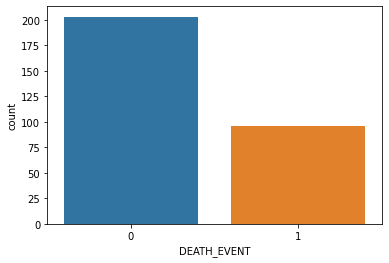

In [6]:
sns.countplot(x='DEATH_EVENT', data=df)

In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

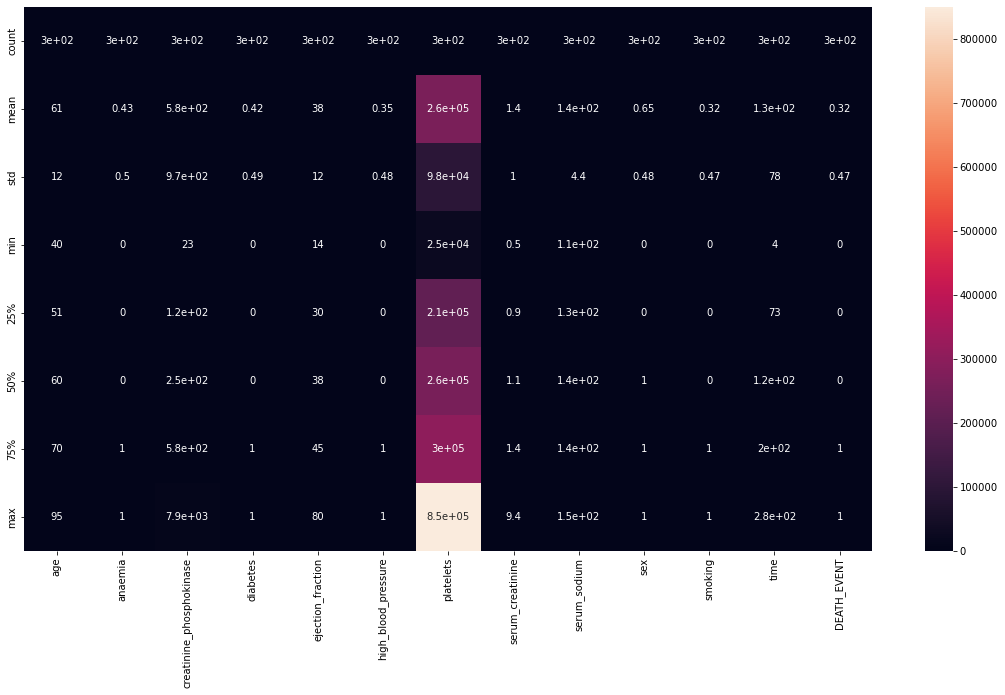

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,10))
sns.heatmap(df.describe(), annot=True)

<AxesSubplot:>

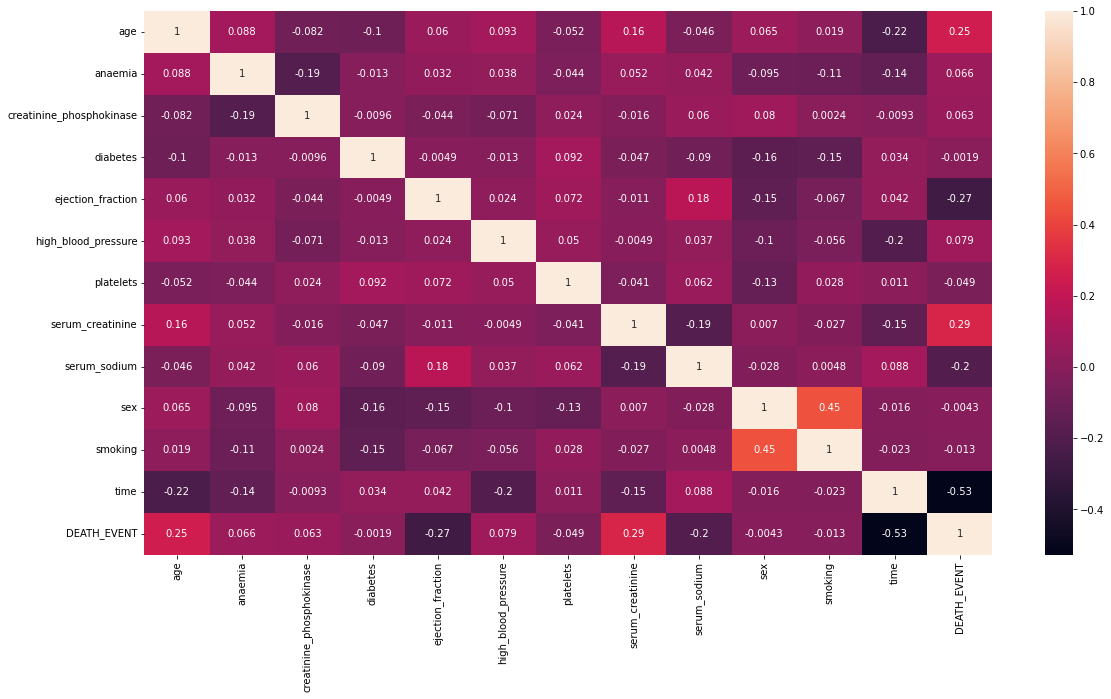

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='diabetes', ylabel='count'>

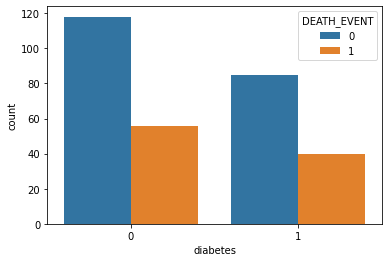

In [12]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

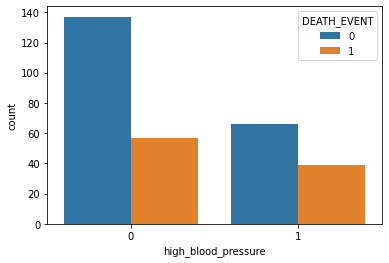

In [13]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

In [14]:
df.shape

(299, 13)

In [15]:
x = df.drop('DEATH_EVENT', axis=1)

In [49]:
y = df[['DEATH_EVENT']]

In [50]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train = 70%
# test = 30%
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=42) # train_size=.70

In [20]:
xtrain.shape

(209, 12)

In [21]:
df.shape

(299, 13)

In [22]:
xtest.shape

(90, 12)

In [23]:
xtrain

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.000,0,582,1,25,0,504000.00,1.0,138,1,0,205
68,70.000,0,161,0,25,0,244000.00,1.2,142,0,0,66
222,42.000,1,86,0,35,0,365000.00,1.1,139,1,1,201
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,0,30
16,87.000,1,149,0,38,0,262000.00,0.9,140,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [27]:
pred = clf.predict(xtest) # predicted y for testing val
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [28]:
xtest['pred_y'] = pred

In [29]:
xtest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,pred_y
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250,1
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129,0
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,0


In [30]:
xtest['actual_y'] = ytest

In [31]:
xtest.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,pred_y,actual_y
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,1,0
265,50.0,1,298,0,35,0,362000.00,0.9,140,1,1,240,0,0
164,45.0,0,2442,1,30,0,334000.00,1.1,139,1,0,129,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,1
77,42.0,0,102,1,40,0,237000.00,1.2,140,1,0,74,0,0
278,50.0,1,1051,1,30,0,232000.00,0.7,136,0,0,246,0,0
93,60.0,1,154,0,25,0,210000.00,1.7,135,1,0,82,0,1
109,45.0,0,292,1,35,0,850000.00,1.3,142,1,1,88,1,0
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,0,1
173,50.0,1,115,0,20,0,189000.00,0.8,139,1,0,146,0,0


In [32]:
xtest = xtest.drop(['pred_y', 'actual_y'], axis=1)

In [33]:
pred = clf.predict(xtest)

In [34]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

# Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [36]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75        53\n           1       0.65      0.59      0.62        37\n\n    accuracy                           0.70        90\n   macro avg       0.69      0.68      0.69        90\nweighted avg       0.70      0.70      0.70        90\n'

In [37]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        53
           1       0.65      0.59      0.62        37

    accuracy                           0.70        90
   macro avg       0.69      0.68      0.69        90
weighted avg       0.70      0.70      0.70        90



In [38]:
cm = confusion_matrix(ytest, pred)
cm

array([[41, 12],
       [15, 22]], dtype=int64)

In [39]:
(42+21) / (42+21+11+16)

0.7

In [40]:
clf.score(xtest, ytest)

0.7

In [41]:
accuracy_score(ytest, pred)

0.7

In [42]:
tp, fn, fp, tn =  confusion_matrix(ytest, pred).reshape(-1)

In [43]:
tp

41

In [44]:
tn

22

In [45]:
fn

12

In [46]:
fp

15

# ROC and AUC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


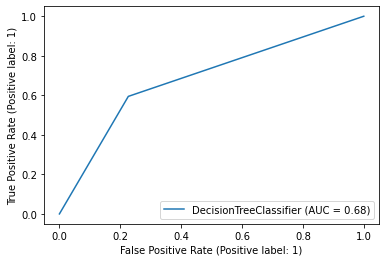

In [47]:
plot_roc_curve(clf, xtest, ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


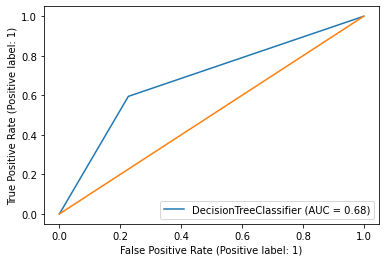

In [48]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])